In [6]:
import pandas as pd

In [8]:
df = pd.read_csv('C:/Users/Dell/Downloads/fake-news/train.csv')

In [9]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [10]:
#Get the independent features
x = df.drop('label',axis=1)

In [11]:
x.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [12]:
y=df['label']

In [13]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [15]:
df.shape

(20800, 5)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [17]:
df=df.dropna()

In [18]:
messages=df.copy()

In [19]:
messages.reset_index(inplace=True)

In [20]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [41]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus = []
for i in range(len(messages)):
    review = re.sub('[^a-zA-Z]',' ', messages['title'][i])
    review = review.lower()
    review  = review.split()

    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review =' '.join(review)
    corpus.append(review)


In [42]:
corpus[3]

'civilian kill singl us airstrik identifi'

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()


In [44]:
X.shape

(18285, 5000)

In [45]:
y=messages['label']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [48]:
cv.get_feature_names_out()[:20]

array(['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl',
       'abort', 'abroad', 'absolut', 'abstain', 'absurd', 'abus',
       'abus new', 'abus new york', 'academi', 'accept', 'access',
       'access pipelin', 'access pipelin protest'], dtype=object)

In [49]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [51]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names_out())


In [52]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [53]:
import matplotlib.pyplot as plt

In [55]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [56]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [57]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.902
Confusion matrix, without normalization


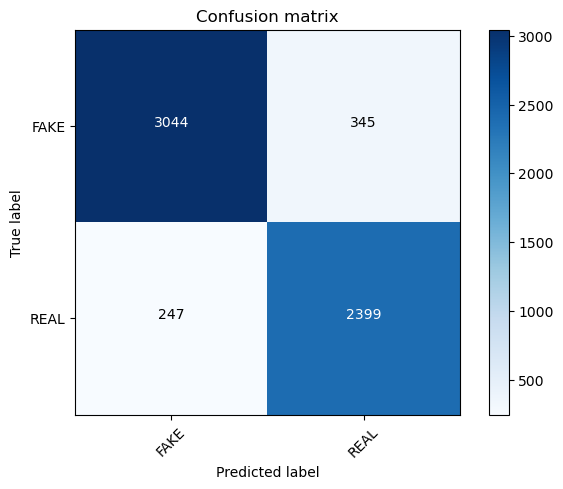

In [58]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [59]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9019055509527755

In [60]:
y_train.shape

(12250,)

Passive Aggressive Classifier Algorithm

In [62]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy:   0.919
Confusion matrix, without normalization


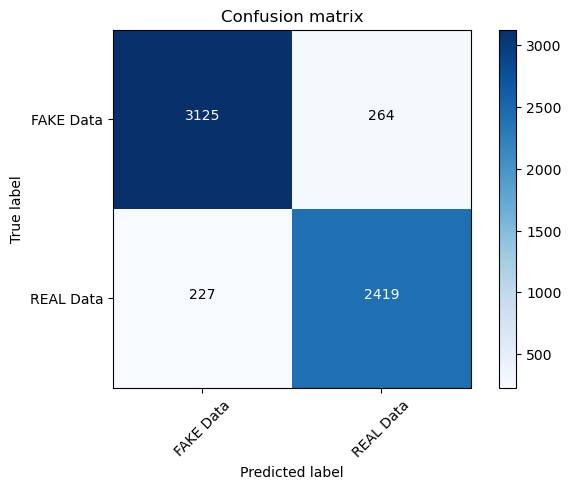

In [63]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

Multinomial Classifier with Hyperparameter

In [64]:
classifier=MultinomialNB(alpha=0.1)

In [65]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

c:\Users\Dell\anaconda3\lib\site-packages\sklearn\naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
c:\Users\Dell\anaconda3\lib\site-packages\sklearn\naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Alpha: 0.0, Score : 0.8903065451532726
Alpha: 0.1, Score : 0.9020712510356255
Alpha: 0.2, Score : 0.9025683512841757
Alpha: 0.30000000000000004, Score : 0.9024026512013256
Alpha: 0.4, Score : 0.9017398508699255
Alpha: 0.5, Score : 0.9015741507870754
Alpha: 0.6000000000000001, Score : 0.9022369511184756
Alpha: 0.7000000000000001, Score : 0.9025683512841757
Alpha: 0.8, Score : 0.9015741507870754
Alpha: 0.9, Score : 0.9017398508699255


In [67]:
## Get Features names
feature_names = cv.get_feature_names_out()

In [69]:
classifier.feature_log_prob_[0]

array([ -9.06056227,  -9.06056227, -10.28838629, ...,  -9.99212048,
       -11.45845755,  -9.42157562])

In [70]:
### Most real
sorted(zip(classifier.feature_log_prob_[0], feature_names), reverse=True)[:20]

[(-2.9468577463990755, 'new'),
 (-2.994219848520549, 'time'),
 (-3.000566240637532, 'york'),
 (-3.0008020674474167, 'new york'),
 (-3.014815217142134, 'york time'),
 (-3.014815217142134, 'new york time'),
 (-3.9648310157438633, 'breitbart'),
 (-4.004573851696944, 'trump'),
 (-5.2756841712452855, 'donald'),
 (-5.282590276041697, 'donald trump'),
 (-5.755045510465673, 'say'),
 (-5.992274458590198, 'obama'),
 (-6.016039835625665, 'clinton'),
 (-6.106599412671392, 'presid'),
 (-6.122523316028115, 'state'),
 (-6.177512429323892, 'report'),
 (-6.188882648465076, 'attack'),
 (-6.253840544739848, 'hous'),
 (-6.259960514881633, 'brief'),
 (-6.316793989644799, 'hillari')]

In [71]:
### Most fake
sorted(zip(classifier.feature_log_prob_[0], feature_names))[:5000]

[(-11.458457546147459, 'access pipelin protest'),
 (-11.458457546147459, 'acknowledg emf'),
 (-11.458457546147459, 'acknowledg emf damag'),
 (-11.458457546147459, 'acquit'),
 (-11.458457546147459, 'acr'),
 (-11.458457546147459, 'adhd'),
 (-11.458457546147459, 'airstrik kill'),
 (-11.458457546147459, 'al nusra'),
 (-11.458457546147459, 'america last'),
 (-11.458457546147459, 'america vote'),
 (-11.458457546147459, 'american concern'),
 (-11.458457546147459, 'american concern elect'),
 (-11.458457546147459, 'american peopl defeat'),
 (-11.458457546147459, 'aqsa'),
 (-11.458457546147459, 'arabian'),
 (-11.458457546147459, 'ariel noyola'),
 (-11.458457546147459, 'ariel noyola rodr'),
 (-11.458457546147459, 'ask question'),
 (-11.458457546147459, 'auf'),
 (-11.458457546147459, 'avail'),
 (-11.458457546147459, 'babi powder'),
 (-11.458457546147459, 'bad news'),
 (-11.458457546147459, 'badg'),
 (-11.458457546147459, 'ballot'),
 (-11.458457546147459, 'baltic'),
 (-11.458457546147459, 'banana')